<center><h1>Lecture-06: SVM-Gradient Boosting-Hypothesis Testing </h1><center>
<p>&nbsp;</p>
<center>CDSCO2004U "Machine Learning and Deep Learning"</center>

# Exercise-01: Find the necessary minimum sample size to construct a 98% confidence interval for p with a margin of error E = 0.05, 
- Assuming that no prior knowledge about p is available
- Assuming that prior studies suggest that p is about 0.1. 
* Given, "Cumulative Normal Probability" of Z=-1.55 is 0.0606
* Apply below equation

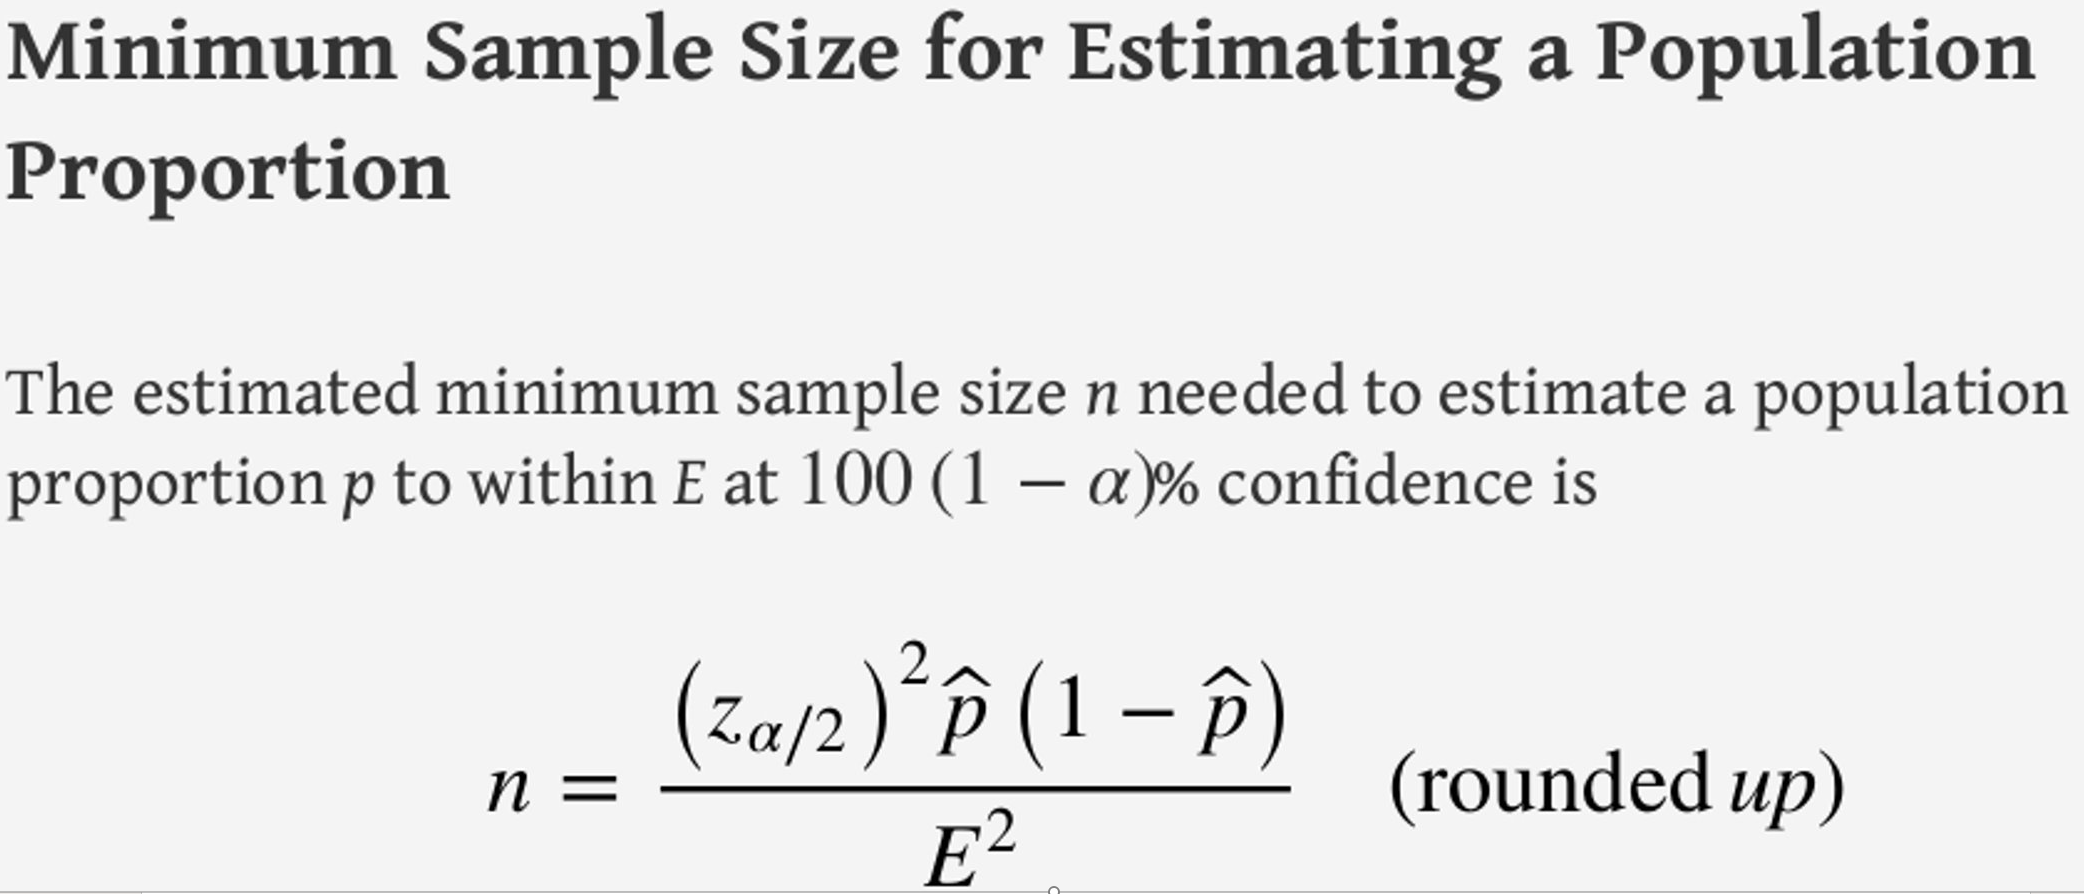

In [1]:
from IPython.display import Image
Image(filename='q01.png')

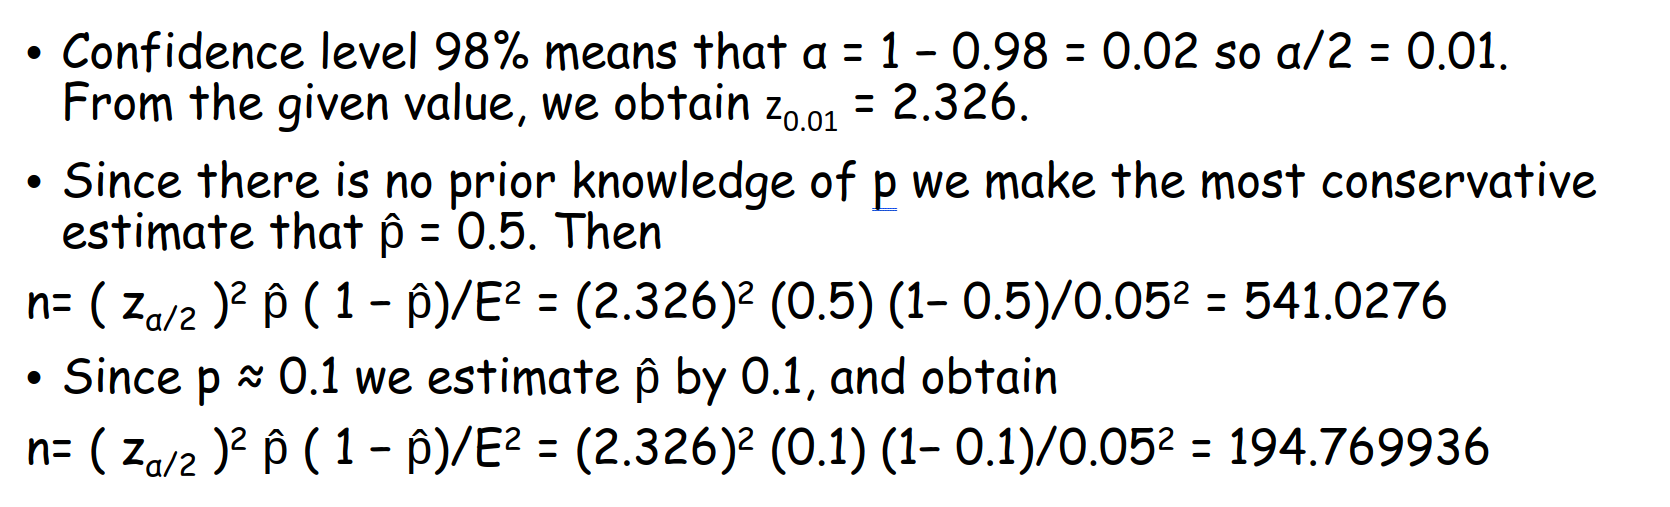

In [2]:
Image(filename='q01_sol.png')

# Exercise-02: Hypothesis Testing
The total score in a professional basketball game is the sum of the scores of the two teams. An expert commentator claims that the average total score for NBA games is 202.5. A fan suspects that this is an overstatement and that the actual average is less than 202.5. He selects a random sample of 85 games and obtains a mean total score of 199.2 with standard deviation 19.63. Determine, at the 5% level of significance, whether there is sufficient evidence in the sample to reject the expert commentator’s claim. [Given, "Cumulative Normal Probability" of Z=-1.55 is 0.0606]

# Solution
Step 1. Let μ be the true average total game score of all NBA games. The relevant test is H0 : μ = 202.5. vs. Ha : μ < 202.5 @ α = 0.05. The sample is large and the population standard deviation is unknown. Thus the test statistic is Z = (x − μ0)/(s/√n) and has the standard normal distribution. Z=(x − μ0)/(s/√n) = (199.2 − 202.5)/(19.63 /√85) = −1.55

The area of the left tail cut off by z = −1.55 is 0.0606 (given). Since the test is left-tailed, the p-value is, p = 0.0606. Since p = 0.0606 > 0.05 = α , the decision is not to reject H0. In the context of the problem our conclusion is: The data do not provide sufficient evidence, at the 5% level of significance, to conclude that the average total score of NBA games is less than 202.5.

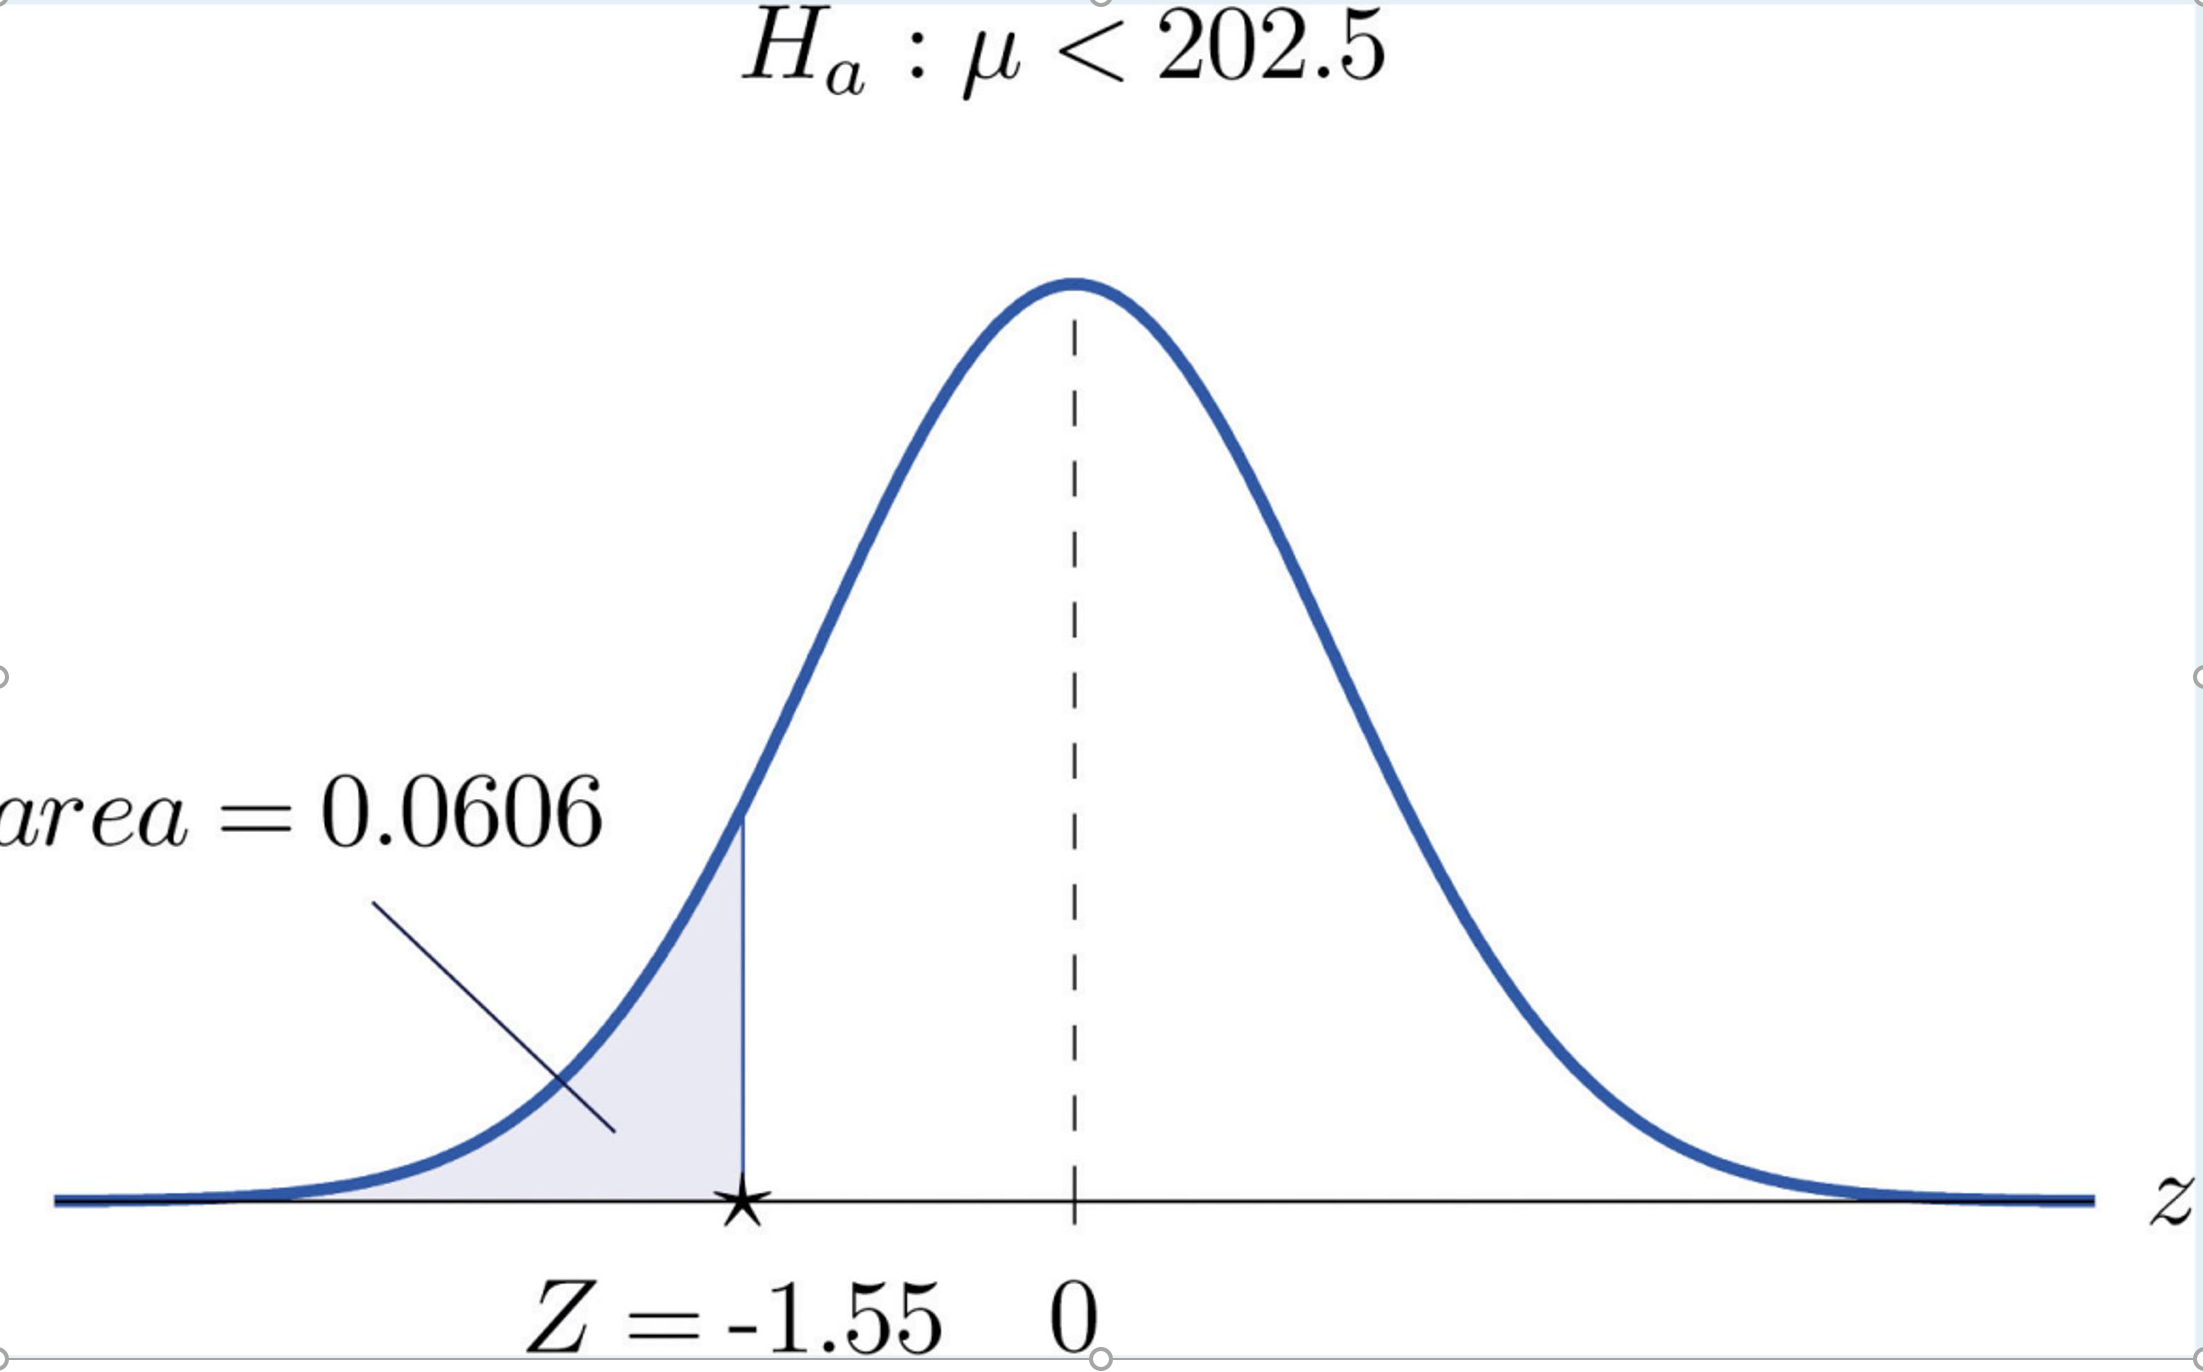

In [3]:
from IPython.display import Image
Image(filename='nd.png')

# Exercise-03: Implement support vector machines for the facial recognition problem
- Each image contains [62×47] or nearly 3,000 pixels.
- PCA to extract 150 features: Feed output of PCA as input to SVC (into a single pipeline)
- Use a grid search for C (controls the margin hardness) and gamma (size  of radial basis kernel), and determine the best model
- Use cross-validated model to predict labels for test data
- Print test images along with their predicted values
- [Optiona] Finally estimator's performance using the classification report/confusion matrix.

In [4]:
# import the packages
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


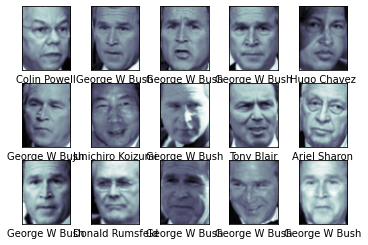

In [5]:
# plot a few of these faces to see what you're working with:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [6]:
#[TODO] Each image contains [62×47] or nearly 3,000 pixels. 
# Use principal component analysis to extract 150 fundamental components to feed into 
# your support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor 
# and the classifier into a single pipeline:
# [Hints]: use RandomizedPCA method to perform your calculation

In [7]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [8]:
#[TODO] For the sake of testing classifier output, split the data into a training and testing set:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [9]:
#[TODO] Finally, use a grid search cross-validation (Use GridSearchCV method) to explore combinations of parameters. 
# Here adjust C (set the value range [1, 5, 10, 50]) (which controls the margin hardness) and gamma (set the value range [0.0001, 0.0005, 0.001, 0.005]) (which controls the size 
# of the radial basis function kernel), and determine the best model:

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 57s, sys: 2.08 s, total: 1min 59s
Wall time: 31.8 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [10]:
#[TODO] Now with this cross-validated model, 
# you can predict the labels for the test data, which the model has not yet seen:

model = grid.best_estimator_
yfit = model.predict(Xtest)

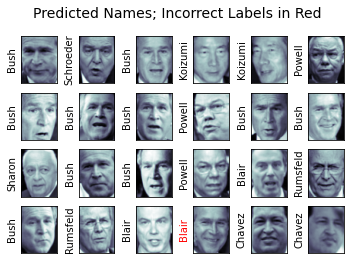

In [11]:
#[TODO] Look at a few of the test images along with their predicted values:

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [12]:
#[TODO] Out of this small sample, optimal estimator mislabeled only a single face 
# (Bush’s face in the bottom row was mislabeled as Blair). We can get a better sense 
# of our estimator's performance using the classification report, which lists recovery statistics label by label:

print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



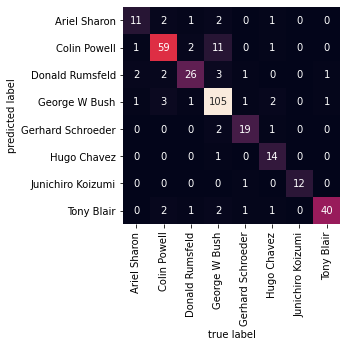

In [13]:
#[TODO] Also display the confusion matrix between these classes
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');